In [30]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
iris = datasets.load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

# PASOS PARA UN BUEN ML:

## 0. Examinamos datos y les damos estructura decente.

## 1. Separamos en 'X' e 'y' las variables dependientes y las targets etiquetadas.  

In [11]:
X = iris.data
y = iris.target

## 2. Creamos un DF organizado con el data (con X)

In [53]:
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.sample(3))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
105                7.6               3.0                6.6               2.1
115                6.4               3.2                5.3               2.3
51                 6.4               3.2                4.5               1.5


## 3. Hacemos un muestreo visual para ver qué pinta tiene la relación Data-Target.

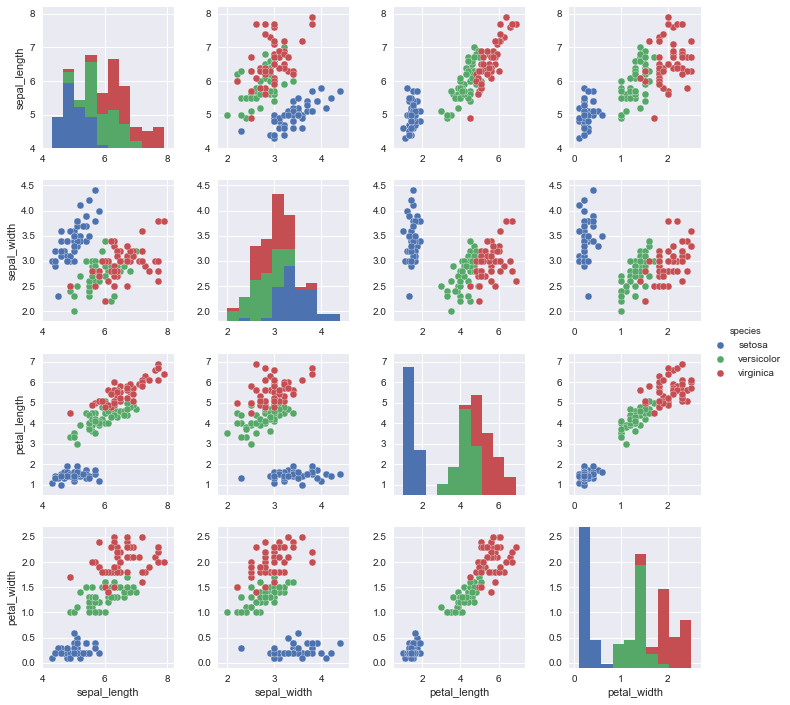

In [31]:
# Con seaborn, necesario cargar %matplotlib.inline:
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008A3FD66908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000008A3C5E4550>]], dtype=object)

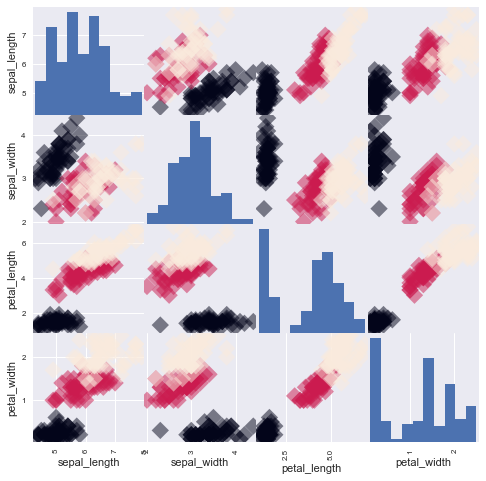

In [35]:
# Con pandas, necesario cargar %matplotlib.inline:
pd.scatter_matrix(df,c=y,figsize=[8,8],
                 s=150,marker='D')

## 4.Cargamos y usamos un clasificador.

Si en el muestreo gráfico anterior vemos que no hay muchas correlaciones lo mejor será un algoritmo NO PARAMÉTRICO como K-vecinos. Si hay correlaciones y tienen sentido en la realidad (no son coincidencias o modas del momento que pueden hacer efímero nuestro modelo) es muy buena opción un predictor PARAMETRICO como la regresión lineal.

In [38]:
# En este caso cogeremos  un NO PARAMETRICO como K-vecinos por ser ilustrativo: 
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=6)

In [41]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [54]:
prediction = knn.predict([[6.4    ,   3.2       ,  5.3 ,     2.3]])

In [55]:
print('prediction{}'.format(prediction))

prediction[2]


In [52]:
#Comprobamos que fuciona:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])